In [1]:
using DynamicalSystems, Plots

## Build dynamical system

In [2]:
function IPF_s(g,α,t)
    # k=complex(zeros(1))
    k=g[1]-log(complex(g[1]/α[1]))
                       
    return SVector{1, ComplexF64}(k)
end 

IPF_s (generic function with 1 method)

In [3]:
#initial values
g₀= [1.]
α=[0.6]

IPF_map = DiscreteDynamicalSystem(IPF_s, complex(g₀),α)

1-dimensional DeterministicIteratedMap
 deterministic: true
 discrete time: true
 in-place:      false
 dynamic rule:  IPF_s
 parameters:    [0.6]
 time:          0
 state:         ComplexF64[1.0 + 0.0im]


### Time series

In [4]:
step!(IPF_map)
current_state(IPF_map)

1-element SVector{1, ComplexF64} with indices SOneTo(1):
 0.4891743762340093 + 0.0im

In [5]:
reinit!(IPF_map)
set_parameters!(IPF_map,[0.53]) #change α

In [6]:
step!(IPF_map)
current_state(IPF_map)

1-element SVector{1, ComplexF64} with indices SOneTo(1):
 0.3651217275640306 + 0.0im

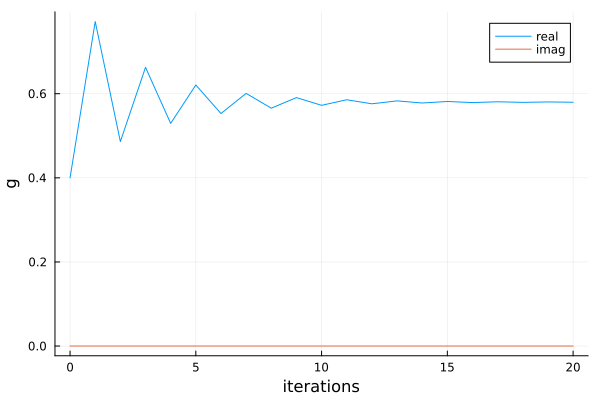

In [28]:
reinit!(IPF_map)
set_parameters!(IPF_map,[0.58]) #change α


X, t = trajectory(IPF_map, 20)

plot(t,real.(X[:,1]), label="real", legend=:topright, xlabel="iterations", ylabel="g")
plot!(t,imag.(X[:,1]), label="imag")

## Orbit diagram

In [24]:
values = range(0.3, 1, length=400) #Values for α

g0= [0.1] # Specify an initial state
n= 50 # Amount of points to save for each parameter value
Ttr= 500 # Each orbit is evolved for Ttr first before saving output

i=1
parameter=1

orbit = orbitdiagram(IPF_map, 1, 1, values; n, Ttr, u0=g0, show_progress=true);

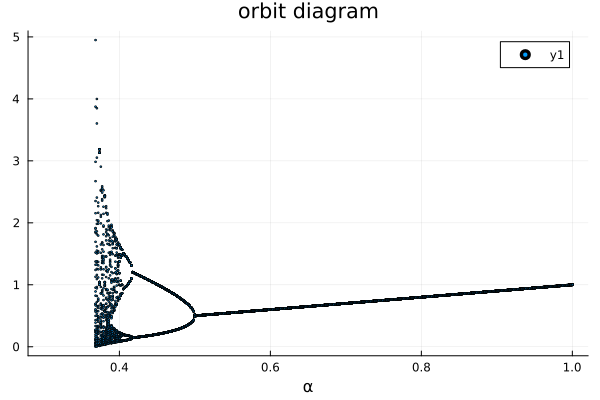

In [25]:
L = length(values)
x = Vector{Float64}(undef, n * L)
y = complex(copy(x))
for j in 1:L
    x[(1+(j-1)*n):j*n] .= values[j]
    y[(1+(j-1)*n):j*n] .= orbit[j]
end

y[imag(y).!=0].=NaN

scatter(real(x),real(y), ms=1, xlabel="α", title="orbit diagram")

## Fixed point stability

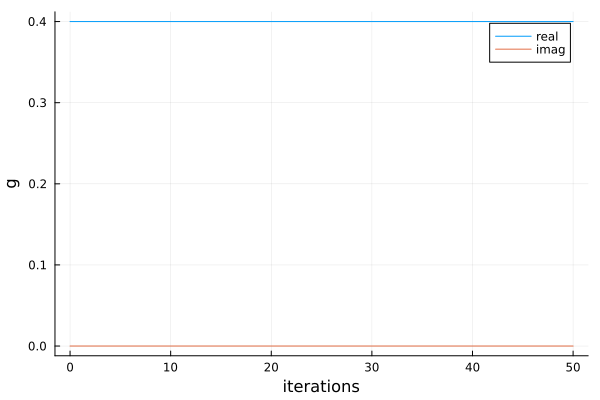

In [27]:
α=[0.4]
g₀= copy(α).*1

IPF_map = DiscreteDynamicalSystem(IPF_s, complex(g₀),α)


X, t = trajectory(IPF_map, 50)

plot(t,real.(X[:,1]), label="real", legend=:topright, xlabel="iterations", ylabel="g")
plot!(t,imag.(X[:,1]), label="imag")